In [1]:
from textblob import TextBlob
import sys,tweepy
import matplotlib.pyplot as plt
%matplotlib inline


Enter Keyword to search : modi
Enter how many tweets : 20
General Report: 
Weakly Negative

Detailed Report: 
5.00% people thought it was positive
15.00% people thought it was weakly positive
0.00% people thought it was strongly positive
10.00% people thought it was negative
30.00% people thought it was weakly negative
0.00% people thought it was strongly negative
40.00% people thought it was neutral


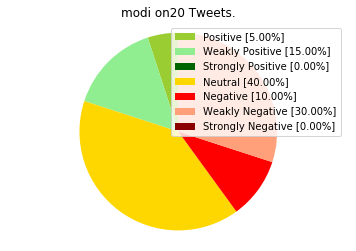

In [4]:
import sys,tweepy,csv,re
from textblob import TextBlob
import matplotlib.pyplot as plt
# keep those keys secret bcos with those someone else can tweet from your accout

class SentimentAnalysis:

    def __init__(self):
        self.tweets = []
        self.tweetText = []

    def DownloadData(self):
        # authenticating  #connecting with the api's
        consumerKey = 'PPP84YZ3Tuc6z1iHxkBVhHAyNhw'
        consumerSecret = 'PPJlhrbGufEFTJuzrVBnGvxn7ZWTv8iH6Xbr2SgjNxfAdYC8Ynsi'
        accessToken = 'PP1039839866433892352-Vp33Kxb8gA2vSnVn5RMHeJJS2nzt3g'
        accessTokenSecret = 'PPtUHNGXfoJDCW3b1VHo3Sw4ro5X0umtaqDcgYEiCrfiCD5'
        auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
        auth.set_access_token(accessToken, accessTokenSecret)
        api = tweepy.API(auth)
        #OAuth for authentication
        #we create authorisation to our api's and we reate an api object
        # input for term to be searched and how many tweets to search
        searchTerm = input("Enter Keyword to search : ")
        NoOfTerms = int(input("Enter how many tweets : "))

        # searching for tweets#we search the search term with help of api
        self.tweets = tweepy.Cursor(api.search, q=searchTerm, lang = "en").items(NoOfTerms)
        csvFile = open('result.csv', 'a')
        csvWriter = csv.writer(csvFile)
        polarity = 0
        positive = 0
        wpositive = 0
        spositive = 0
        negative = 0
        wnegative = 0
        snegative = 0
        neutral = 0

        #text blob gives the polarity of a string or a sentence between -1 to 1
        # iterating through tweets fetched
        for tweet in self.tweets:
            #Append to temp so that we can store in csv later. I use encode UTF-8
            self.tweetText.append(self.cleanTweet(tweet.text).encode('utf-8'))
            # print (tweet.text.translate(non_bmp_map))    #print tweet's text
            analysis = TextBlob(tweet.text)
            # print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # adding reaction of how people are reacting to find average later
                neutral += 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive += 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                spositive += 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                wnegative += 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative += 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                snegative += 1


        # Write to csv and close csv file
        csvWriter.writerow(self.tweetText)
        csvFile.close()

        # finding average of how people are reacting
        positive = self.percentage(positive, NoOfTerms)
        wpositive = self.percentage(wpositive, NoOfTerms)
        spositive = self.percentage(spositive, NoOfTerms)
        negative = self.percentage(negative, NoOfTerms)
        wnegative = self.percentage(wnegative, NoOfTerms)
        snegative = self.percentage(snegative, NoOfTerms)
        neutral = self.percentage(neutral, NoOfTerms)

        # finding average reaction
        polarity = polarity / NoOfTerms

        # printing out data
        print("General Report: ")

        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people thought it was positive")
        print(str(wpositive) + "% people thought it was weakly positive")
        print(str(spositive) + "% people thought it was strongly positive")
        print(str(negative) + "% people thought it was negative")
        print(str(wnegative) + "% people thought it was weakly negative")
        print(str(snegative) + "% people thought it was strongly negative")
        print(str(neutral) + "% people thought it was neutral")

        self.plotPieChart(positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, NoOfTerms)


    def cleanTweet(self, tweet):
        # Remove Links, Special Characters etc from tweet
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +)", " ", tweet).split())

    # function to calculate percentage
    def percentage(self, part, whole):
        temp = 100 * float(part) / float(whole)
        return format(temp, '.2f')

    def plotPieChart(self, positive, wpositive, spositive, negative, wnegative, snegative, neutral, searchTerm, noOfSearchTerms):
        labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]','Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]', 'Strongly Negative [' + str(snegative) + '%]']
        sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
        colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
        patches, texts = plt.pie(sizes, colors=colors, startangle=90)
        plt.legend(patches, labels, loc="best")
        plt.title( searchTerm + ' on' + str(noOfSearchTerms) + ' Tweets.')
        plt.axis('equal')
        plt.show()



sa = SentimentAnalysis()
sa.DownloadData()

In [7]:
from textblob import TextBlob
x='im a very talented guy'
y='im a cricketer'
z='im a worst kind of human'
TextBlob(y).sentiment.polarity

0.0

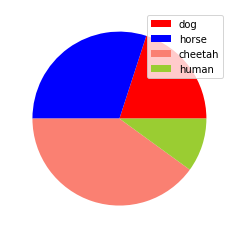

In [8]:
patches,text=plt.pie([20,30,40,10],colors=['red','blue','salmon','yellowgreen'])
labels=['dog','horse','cheetah','human']
plt.legend(patches,labels)